In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Convert target labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Dense layer 사용해서 MLP 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# 콜백 설정: 조건에서 모델 조기 종료 설정
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            min_delta=0.001, # 개선된 것으로 간주할 최소 변화량
                                            patience=1, # x번의 epoch동안 데이터 손실이 개선되지 않으면 그만(위반 허용 횟수)
                                            verbose=1, # 콜백이 동작하는 동안 로그를 출력할지 여부 0:출력(x), 1:출력(O)
                                            mode='auto') # auto는 자동으로 감지, min은 감소할때, max는 증가할때 개선된 것으로 판단

def scheduler(epoch, lr):
    if epoch % 2 == 0 and epoch:
        return 0.1*lr
    return lr
#callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

ret = model.fit(x_train, y_train, epochs=100, batch_size=200,
                validation_split=0.2, verbose=2, callbacks=[callback])


Epoch 1/100


ValueError: in user code:

    File "c:\users\sou05094\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\users\sou05094\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\sou05094\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\users\sou05094\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "c:\users\sou05094\appdata\local\programs\python\python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\sou05094\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(200, 32, 32, 3)


In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Convert target labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Dense layer 사용해서 MLP 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

path='/Users/user/Desktop/'
if not os.path.isdir(path):
    os.mkdir(path)
    
logdir = path +"3101"
callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, update_freq='epoch', histogram_freq=10
                                          , write_images=True)

ret = model.fit(x_train, y_train, epochs=100, batch_size=200,
                validation_split=0.2, verbose=2, callbacks=[callback])

170498071/170498071 [==============================] - 22s 0us/step


FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '/Users/user/Desktop/'

In [4]:
init = tf.keras.initializers.he_uniform()
# alpha는 음수쪽 기울기 설정
act = tf.keras.layers.LeakyReLU(alpha=0.3)
n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=10, activation='softmax', kernel_initializer=init))
model.summary()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)              

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [5]:
# 그래디언트 소실 방지 방법:활성화 함수로 ‘ReLU’ 또는 ‘LeakyReLU’함수 적용하고 He초기화 사용
ret = model.fit(x_train, y_train, epochs=101, batch_size=200, validation_split=0.2,
                verbose=2)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)


Epoch 1/101
240/240 - 1s - loss: 4.2760 - accuracy: 0.6058 - val_loss: 0.4910 - val_accuracy: 0.8733 - 1s/epoch - 5ms/step
Epoch 2/101
240/240 - 0s - loss: 1.6435 - accuracy: 0.7450 - val_loss: 0.3920 - val_accuracy: 0.8938 - 490ms/epoch - 2ms/step
Epoch 3/101
240/240 - 0s - loss: 1.5721 - accuracy: 0.7999 - val_loss: 0.5459 - val_accuracy: 0.8122 - 500ms/epoch - 2ms/step
Epoch 4/101
240/240 - 1s - loss: 0.8460 - accuracy: 0.8466 - val_loss: 0.5287 - val_accuracy: 0.8605 - 521ms/epoch - 2ms/step
Epoch 5/101
240/240 - 1s - loss: 0.4765 - accuracy: 0.8783 - val_loss: 0.4810 - val_accuracy: 0.8637 - 526ms/epoch - 2ms/step
Epoch 6/101
240/240 - 1s - loss: 0.3924 - accuracy: 0.9072 - val_loss: 0.5908 - val_accuracy: 0.8466 - 520ms/epoch - 2ms/step
Epoch 7/101
240/240 - 1s - loss: 0.3144 - accuracy: 0.9194 - val_loss: 0.4207 - val_accuracy: 0.8867 - 521ms/epoch - 2ms/step
Epoch 8/101
240/240 - 1s - loss: 0.2657 - accuracy: 0.9312 - val_loss: 0.2356 - val_accuracy: 0.9415 - 523ms/epoch - 2ms/

In [6]:
# 배치 정규화 적용

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=10, activation='softmax', kernel_initializer=init))
model.summary()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                      

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [7]:
ret = model.fit(x_train, y_train, epochs=101, batch_size=200, validation_split=0.2,
                verbose=2)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)


Epoch 1/101
240/240 - 2s - loss: 0.4722 - accuracy: 0.8651 - val_loss: 0.4811 - val_accuracy: 0.8935 - 2s/epoch - 6ms/step
Epoch 2/101
240/240 - 1s - loss: 0.1988 - accuracy: 0.9413 - val_loss: 0.2660 - val_accuracy: 0.9346 - 646ms/epoch - 3ms/step
Epoch 3/101
240/240 - 1s - loss: 0.1437 - accuracy: 0.9573 - val_loss: 0.2011 - val_accuracy: 0.9465 - 600ms/epoch - 3ms/step
Epoch 4/101
240/240 - 1s - loss: 0.1191 - accuracy: 0.9655 - val_loss: 0.1309 - val_accuracy: 0.9633 - 645ms/epoch - 3ms/step
Epoch 5/101
240/240 - 1s - loss: 0.0980 - accuracy: 0.9707 - val_loss: 0.1362 - val_accuracy: 0.9652 - 599ms/epoch - 2ms/step
Epoch 6/101
240/240 - 1s - loss: 0.0861 - accuracy: 0.9741 - val_loss: 0.1274 - val_accuracy: 0.9673 - 590ms/epoch - 2ms/step
Epoch 7/101
240/240 - 1s - loss: 0.0753 - accuracy: 0.9769 - val_loss: 0.1730 - val_accuracy: 0.9567 - 588ms/epoch - 2ms/step
Epoch 8/101
240/240 - 1s - loss: 0.0694 - accuracy: 0.9786 - val_loss: 0.1305 - val_accuracy: 0.9658 - 592ms/epoch - 2ms/

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
1875/1875 - 1s - loss: 2.3854e-05 - accuracy: 1.0000 - 1s/epoch - 798us/step
313/313 - 0s - loss: 0.1324 - accuracy: 0.9810 - 243ms/epoch - 777us/step


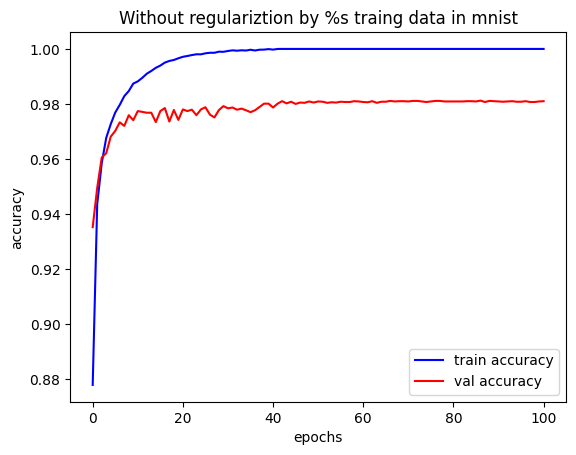

In [9]:
act = 'relu'
init = 'he_uniform'
n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

opt = 'rmsprop'
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

ret = model.fit(x_train, y_train, epochs=101, batch_size=400, validation_data=(x_test, y_test), verbose=0)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

plt.title("Without regulariztion by traing data in mnist")
plt.plot(ret.history['accuracy'], "b-", label = "train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label = "val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()


1875/1875 - 2s - loss: 0.2031 - accuracy: 0.9654 - 2s/epoch - 812us/step
313/313 - 0s - loss: 0.2177 - accuracy: 0.9622 - 247ms/epoch - 789us/step


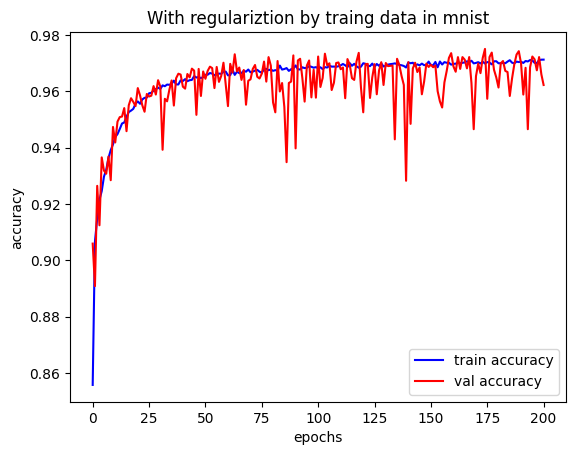

In [15]:
# 규제 사용
reg = tf.keras.regularizers.l2(0.01)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model2.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer= init,
                                 kernel_regularizer=reg))
model2.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer= init,
                                 kernel_regularizer=reg))
model2.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

ret2 = model2.fit(x_train, y_train, epochs=201, batch_size=400,
                  validation_data=(x_test, y_test), verbose = 0)
train_loss2, train_acc2 = model2.evaluate(x_train, y_train, verbose=2)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=2)

plt.title("With regulariztion by traing data in mnist")
plt.plot(ret2.history['accuracy'], "b-", label = "train accuracy")
plt.plot(ret2.history['val_accuracy'], "r-", label = "val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_44 (Dense)            (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_45 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-tra

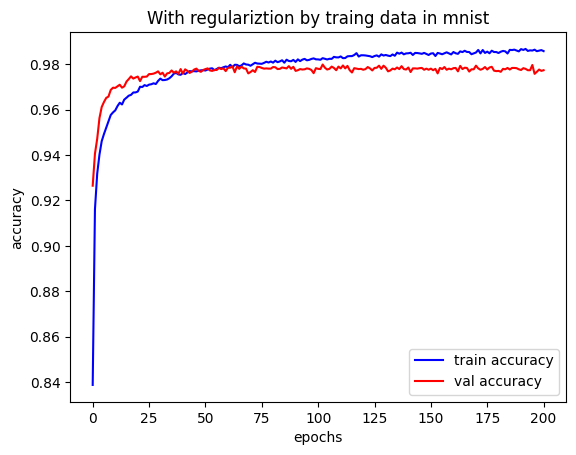

In [18]:
act = tf.keras.layers.LeakyReLU(alpha=0.3)
dropout_rate = 0.2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=201, batch_size=400, validation_data=(x_test,y_test),
                verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

plt.title("With regulariztion by traing data in mnist")
plt.plot(ret.history['accuracy'], "b-", label = "train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label = "val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_41 (Dense)            (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_42 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-tra

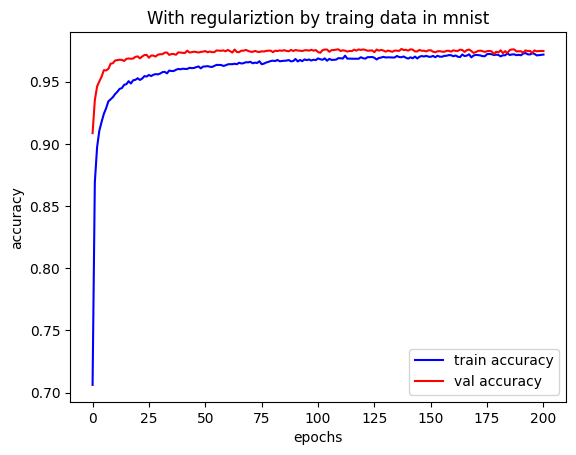

In [17]:
# 드롭아웃 비율을 0.5를 주고 학습 시킬때
dropout_rate = 0.5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=201, batch_size=400, validation_data=(x_test,y_test),
                verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

plt.title("With regulariztion by traing data in mnist")
plt.plot(ret.history['accuracy'], "b-", label = "train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label = "val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()